In [2]:
import time
import numpy as np
import pandas as pd

## If builded with Cmake

In [1]:
import sys
sys.path.append('../build')
import dataframe_bindings as df


In [2]:
data = df.DataFrame()

## If builded and installed via `setup.py`

In [1]:
# from pytoolbox import dataframe_bindings as df
from pytoolbox.dataframe import DataFrame

In [4]:
import pytoolbox.dataframe
help(pytoolbox.dataframe)

Help on module pytoolbox.dataframe in pytoolbox:

NAME
    pytoolbox.dataframe

CLASSES
    pybind11_builtins.pybind11_object(builtins.object)
        dataframe_bindings.DataFrame

    class DataFrame(pybind11_builtins.pybind11_object)
     |  Method resolution order:
     |      DataFrame
     |      pybind11_builtins.pybind11_object
     |      builtins.object
     |
     |  Methods defined here:
     |
     |  __getitem__(self, column_name: str) -> List[Union[float, str, NoneType]]
     |      Allows Pythonic access to columns via indexing.
     |
     |  __init__(...)
     |      __init__(self: dataframe_bindings.DataFrame) -> None
     |
     |      Constructor for the DataFrame class
     |
     |                  Parameters:
     |                      None
     |
     |  __iter__ = df_iter(dataframe)
     |
     |  __len__(self)
     |      Returns the number of rows in the DataFrame.
     |
     |  __str__(self)
     |
     |  add_column(...)
     |      add_column(self: dataf

# Using the C++ module

In [2]:
iris = DataFrame()

iris.read_csv('../datasets/iris.csv')
print(iris)

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1.0            5.1           NaN            1.4           0.2   
1      2.0            4.9           3.0            1.4           0.2   
2      3.0            4.7           3.2            1.3           NaN   
3      4.0            4.6           3.1            1.5           0.2   
4      5.0            5.0           3.6            1.4           0.2   
..     ...            ...           ...            ...           ...   
145  146.0            6.7           3.0            5.2           2.3   
146  147.0            6.3           2.5            5.0           1.9   
147  148.0            6.5           3.0            5.2           2.0   
148  149.0            6.2           3.4            5.4           2.3   
149  150.0            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
.. 

In [4]:
iris.head()

----------------------------------------- Dataset Head -----------------------------------------
Id              SepalLengthCm   SepalWidthCm    PetalLengthCm   PetalWidthCm    Species         
1               5.1             nan             1.4             0.2             Iris-setosa     
2               4.9             3               1.4             0.2             Iris-setosa     
3               4.7             3.2             1.3             nan             Iris-setosa     
4               4.6             3.1             1.5             0.2             Iris-setosa     
5               5               3.6             1.4             0.2             Iris-setosa     
------------------------------------------------------------------------------------------------


In [5]:
help(iris.head)

Help on method head in module dataframe_bindings:

head(...) method of dataframe_bindings.DataFrame instance
    head(self: dataframe_bindings.DataFrame) -> None

    Print the first 5 rows of the dataframe

                Parameters:
                    None



## Callback (2/4)

In [6]:
iris.table_nan()
iris.drop_row_nan()
iris.drop_col('Species')


Id              0               
SepalLengthCm   0               
SepalWidthCm    2               
PetalLengthCm   0               
PetalWidthCm    1               
Species         0               


In [ ]:

iris.head()

In [8]:
# Define a Python callback function
def process_row(row):
    print(f"Processing row: {row}")

# Use the callback
iris.calculate_correlation_with_callback(process_row)


--------------------------------- Dataset Head ---------------------------------
Id              SepalLengthCm   SepalWidthCm    PetalLengthCm   PetalWidthCm    
2               4.9             3               1.4             0.2             
4               4.6             3.1             1.5             0.2             
5               5               3.6             1.4             0.2             
6               5.4             3.9             1.7             0.4             
7               4.6             3.4             1.4             0.3             
--------------------------------------------------------------------------------


Processing row: [1.0000000000000002, 0.7054589754246875, -0.3984031067040775, 0.877983450009377, 0.8962933604785313]
Processing row: [0.7054589754246875, 1.0, -0.1065970069187184, 0.8678615651845311, 0.812175360916366]
Processing row: [-0.3984031067040775, -0.1065970069187184, 1.0, -0.4209767050059773, -0.3553290376463929]
Processing row: [0.877983450009377, 0.8678615651845311, -0.4209767050059773, 0.9999999999999999, 0.9613790948476507]
Processing row: [0.8962933604785313, 0.812175360916366, -0.3553290376463929, 0.9613790948476507, 1.0]


In [9]:


# Data preparation
data = np.random.rand(1000, 100)
df_cpp = df.DataFrame()
df_cpp.read_csv("../datasets/large_dataset.csv", ",", False)  

# Using Pandas
start = time.time()
df_pd = pd.DataFrame(data)
correlation_pd = df_pd.corr()
print("Pandas Time:", time.time() - start)

# Using C++ with callbacks
start = time.time()
df_cpp.calculate_correlation_with_callback(lambda row: None)  # No-op callback
print("C++ with callbacks Time:", time.time() - start)

# Using C++ without callbacks
start = time.time()
df_cpp.calculate_correlation() 
print("C++ without callbacks Time:", time.time() - start)


Pandas Time: 0.030581951141357422
C++ with callbacks Time: 1.3628530502319336
C++ without callbacks Time: 1.5154204368591309


## New methods (3/4)

In [10]:

iris = df.DataFrame()
iris.read_csv("../datasets/iris.csv")


In [11]:

# Use dynamically added methods
pandas_df = iris.to_pandas()
print(pandas_df.head())


    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0  1.0            5.1           NaN            1.4           0.2  Iris-setosa
1  2.0            4.9           3.0            1.4           0.2  Iris-setosa
2  3.0            4.7           3.2            1.3           NaN  Iris-setosa
3  4.0            4.6           3.1            1.5           0.2  Iris-setosa
4  5.0            5.0           3.6            1.4           0.2  Iris-setosa


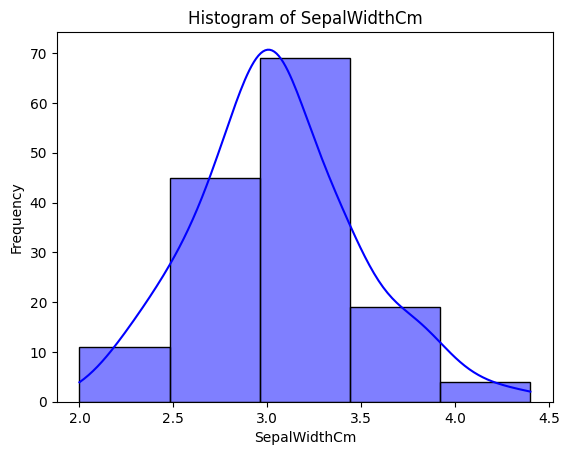

In [12]:
iris.plot_histogram("SepalWidthCm", bins=5)

In [13]:
print(iris.get_header())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [14]:
iris.drop_row_nan()

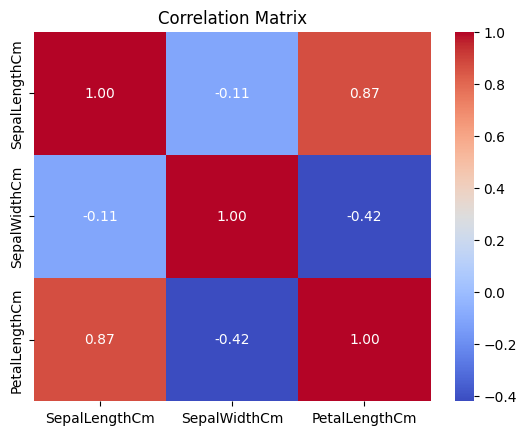

In [15]:
iris.plot_correlation_matrix(["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"])

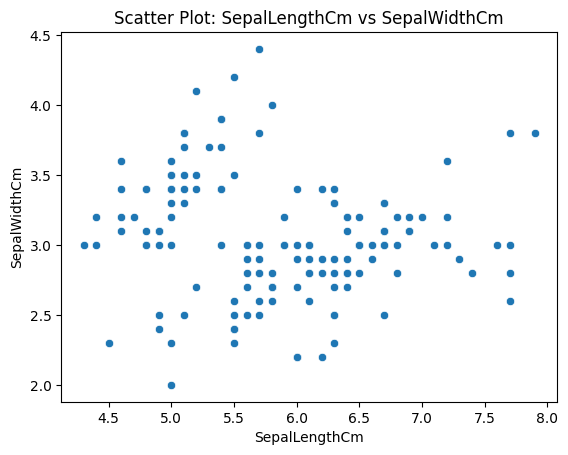

In [16]:
iris.scatter_plot("SepalLengthCm", "SepalWidthCm")

In [17]:
stats = iris.advanced_stat("SepalWidthCm")
print(f"Advanced Stats for 'Age': {stats}")


Advanced Stats for 'Age': {'mean': np.float64(3.0510204081632653), 'std_dev': np.float64(0.43461881757502124), 'skewness': np.float64(0.0), 'kurtosis': np.float64(0.0)}


In [18]:
print(iris)

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      2.0            4.9           3.0            1.4           0.2   
1      4.0            4.6           3.1            1.5           0.2   
2      5.0            5.0           3.6            1.4           0.2   
3      6.0            5.4           3.9            1.7           0.4   
4      7.0            4.6           3.4            1.4           0.3   
..     ...            ...           ...            ...           ...   
142  146.0            6.7           3.0            5.2           2.3   
143  147.0            6.3           2.5            5.0           1.9   
144  148.0            6.5           3.0            5.2           2.0   
145  149.0            6.2           3.4            5.4           2.3   
146  150.0            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
.. 

access using `__get_item__`

In [19]:
for value in iris['Species']:
    print(value)

Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris

testing the `row_iterator`

In [20]:
for row in iris:
    print(row)

[2.0, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa']
[4.0, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa']
[5.0, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa']
[6.0, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa']
[7.0, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa']
[8.0, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa']
[10.0, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa']
[11.0, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa']
[12.0, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa']
[13.0, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa']
[14.0, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa']
[15.0, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa']
[16.0, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa']
[17.0, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa']
[18.0, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa']
[19.0, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa']
[20.0, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa']
[21.0, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa']
[22.0, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa']
[23.0, 4.6, 3.6, 1.0, 0.2, 'Iris-setosa']
[24.0, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa']
[25.0, 4.8, 3.4, 1.9, 0.2, 'Iris-setosa']
[26.0, 5.0, 3.0, 1.6, 0.2, 'Iris-setosa']
[27.0, 5.0, 3.4, 1.6, 0.4, 'Iris-setosa'

In [21]:
# Get an iterator for the iris DataFrame
iris_iterator = iter(iris)

# Iterate over the first 5 rows and print them
for _ in range(5):
    row = next(iris_iterator)
    print(row)

[2.0, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa']
[4.0, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa']
[5.0, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa']
[6.0, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa']
[7.0, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa']


In [22]:
for column in iris.get_header():
    print(f"Column: {column}")
    print(iris[column])

Column: Id
[2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0]
Column: SepalLengthCm
[4.9, 4.6, 5.0, 5.4, 4.6, 5.0, 4.9, 5.4

In [23]:
iris.to_np_array("SepalLengthCm")

array([4.9, 4.6, 5. , 5.4, 4.6, 5. , 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7,
       5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2, 5.2,
       4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4, 5.1, 5. , 4.5,
       4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4, 6.9, 5.5, 6.5,
       5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6, 6.7, 5.6, 5.8,
       6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6. , 5.7, 5.5,
       5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5. ,
       5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9,
       7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. ,
       6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4,
       6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7,
       6.3, 6.5, 6.2, 5.9])